1.	Write down any 3 time series models that can be used for forecasting. (3 points)

Moving averages, exponential smoothing, ARIMA.

2.	What are some real-world applications of time series forecasting? Name two. (2 points)

stock prices, weather

3.	What is the difference between a time series and a panel data set? (2 points)

Time series data means we have data from one unit, over many points in time. Panel data means we have data from many units, over many points in time.

4.	What is the major difference in how we select training sets in time series machine learning tasks compared to regression/classification tasks? (2 marks)

In time series, you cannot split the train/test set randomly. The training set needs to come from data in the same time in order.

5.	Define the following terms as relates to time series models:
a.	Stationarity (1 point)

a time series with no predictable pattern in the long-term. 

b.	Differencing (1 point)

a technique to transform a non-stationary time series into a stationary one. It involves subtracting the current value of the series from the previous one, or from a lagged value.

c.	White noise (1 point)

a series of observations that are independently and identically distributed with a mean of 0 and constant variance. 

d.	Random Walk (1 point)

a series of observations where the current observation equals to the previous observation with a random step up and down.

6.	Consider the following equation:
 a.	Interpret the following equation terms in the above equation: (5 points)
 
 The c and epsilon terms are the "intercepts." c is the value is a constant, and epsilon is the error terms. The first summation is the autocorrection portion. The symbol is the first order autocorrelation coefficient. The second summation is the moving average part. The symbol is the coefficient for lag t. The epsilon t-1 is the first order moving average parameter. 
 
b.	Can you tell from the above equation whether the time series has been differenced? Explain why or why not. (1 point)

We cannot tell if it has been differenced. The data would have already been differenced before.  

c.	What is the Autoregressive (AR) order in the above equation? How about the Moving Average (MA) order (2 points)

AR(3) and MA(4)

d.	How do you determine the AR and MA order? How do you know how many lags to include in your model? (2 points)

You decide the AR order by creating a PACF plot and the MA order by the ACF plot. The number of significant points is how many lags to use.

In [ ]:
# Python version 3.9.12, conda version 22.9.0

In [117]:
import pandas as pd # v 1.4.2
import numpy as np # v 1.21.5
import pmdarima as pm # v 2.0.3
import statsmodels.api as sm # v 0.13.2
import matplotlib.pyplot as plt # 3.5.1
import pandas_profiling as pp # v 3.6.6
import warnings as ww
import statsmodels.tsa.stattools as stattools  # v 0.13.2

from statsmodels.tsa.stattools import adfuller # v 0.13.2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.13.2
from statsmodels.tsa.arima_model import ARIMA # v 0.13.2

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [118]:
ww.filterwarnings("ignore")
%matplotlib inline

In [119]:
electric_production = pd.read_csv("/Users/heidibeardsley/Downloads/Electric_Production.csv")

In [120]:
pp.ProfileReport(electric_production)

# IPG2211A2N (electricity production) is normally distributed. There are no missing values in this dataset. 
# There are no alerts that are a cause for concern, as date should have high cardinality and should be 
# uniformly distributed. Both Date and electricity production should have unique values. 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [121]:
electric_production["DATE"] = pd.to_datetime(electric_production["DATE"]) 

# Python reads DATE column as a date.

In [122]:
electric_production = electric_production.rename(columns = {"IPG2211A2N" : "Electricity Production"}) 

# Renamed the column for simplicity.

In [123]:
# Performing the KPSS test to determine if the variable is stationary.

stattools.kpss(electric_production["Electricity Production"], regression='ct', nlags='auto', store=False)

# KPSS Test statistic: 0.505
# p-value: 0.01

# The data is not stationary at this alpha level.

(0.5051030832418347,
 0.01,
 16,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [124]:
# Performing the AFD test to determine if the variable is stationary.

stattools.adfuller(electric_production["Electricity Production"], maxlag=None, regression='ct', autolag='AIC', store=False, regresults=False)

# ADF Test statistic: -1.583
# p-value: 0.799

# The data is not stationary at this alpha level.

(-1.583046809894316,
 0.7990009170978183,
 15,
 381,
 {'1%': -3.9827296807190695,
  '5%': -3.422076428116805,
  '10%': -3.133863795304231},
 1841.7022320809524)

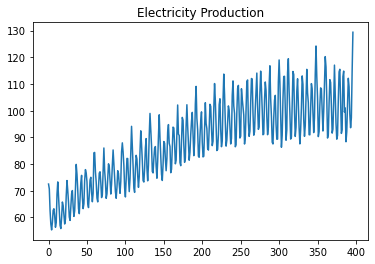

In [125]:
electric_production["Electricity Production"].plot()
plt.title("Electricity Production")

plt.show()

# Plots the electricity production and shows it is not stationary.

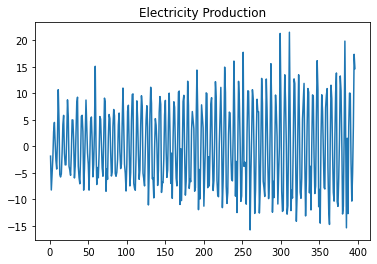

In [126]:
electric_production["Electricity Production"].diff().plot()
plt.title("Electricity Production")

plt.show()

# Shows one difference of the electricity production data, more stationary.

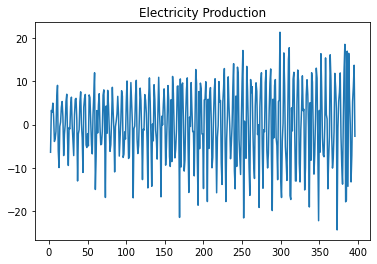

In [127]:
electric_production["Electricity Production"].diff().diff().plot()
plt.title("Electricity Production")

plt.show()

# Shows two differences of the data, data is stationary.

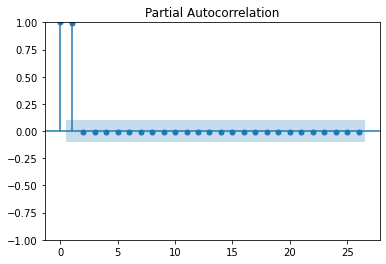

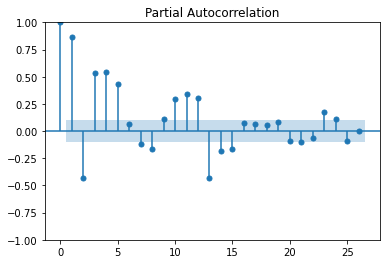

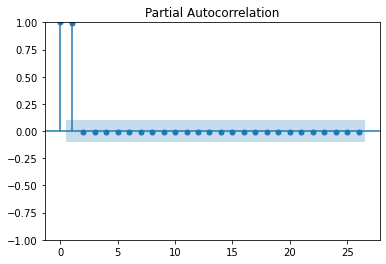

In [128]:
# This plot shows the partial autocorrelation to find AR.

plot_pacf(electric_production["Electricity Production"])
plot_pacf(electric_production["DATE"])

# The date variable has AR(1).
# The electric production has AR(5).

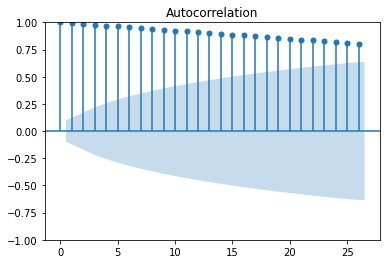

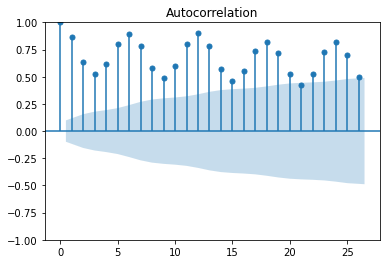

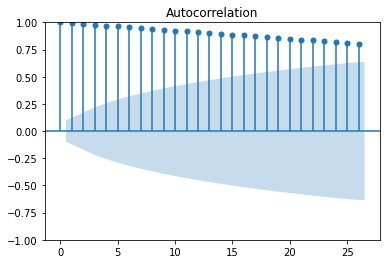

In [129]:
# This plot shows the autocorrelation to find MA.

plot_acf(electric_production["Electricity Production"])
plot_acf(electric_production["DATE"])

# The date variable has over 25 for the MA value. We do not test the date variable so this is ok.
# The electricity production variable has MA(20)

In [130]:
# ARMA: (5, 20)

In [131]:
# ARIMA: (5, 0, 20)
# found according to the tests above.

In [132]:
# Fitting the model to the ARIMA order we found. Using a 70% training set and 30% test set.

model = sm.tsa.arima.ARIMA(electric_production["Electricity Production"].head(int(0.7*len(electric_production))), order=(5, 0, 20))
results = model.fit()

In [133]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Electricity Production   No. Observations:                  277
Model:                    ARIMA(5, 0, 20)   Log Likelihood                -663.619
Date:                    Mon, 02 Oct 2023   AIC                           1381.237
Time:                            14:45:09   BIC                           1479.086
Sample:                                 0   HQIC                          1420.498
                                    - 277                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.1324      7.649     10.868      0.000      68.141      98.124
ar.L1          0.3102      0.074      4.214      0.000       0.166       0.455
ar.L2          0.4797      0.089      5.377      0.000       0.305       0.654
ar.L3         -0.6000      0.064     -9.380      0.000      -0.725      -0.475
ar.L4         -0.0843      0.077     -1.099      0.272      -0.235       0.066
ar.L5          0.8696      0.069     12.662      0.000       0.735       1.004
ma.L1          0.4412      0.151      2.925      0.003       0.146       0.737
ma.L2         -0.3261      0.167     -1.949      0.051      -0.654       0.002
ma.L3          0.4733      0.235      2.014      0.044       0.013       0.934
ma.L4          0.4939      0.194      2.542      0.011       0.113       0.875
ma.L5         -0.7006      0.218     -3.213      0.001      -1.128      -0.273
ma.L6         -0.4305      0.262     -1.645      0.100      -0.943       0.082
ma.L7          0.0302      0.207      0.146      0.884      -0.375       0.436
ma.L8         -0.1854      0.184     -1.007      0.314      -0.546       0.175
ma.L9         -0.1828      0.280     -0.653      0.514      -0.732       0.366
ma.L10         0.3073      0.177      1.735      0.083      -0.040       0.654
ma.L11         0.3331      0.245      1.360      0.174      -0.147       0.813
ma.L12         0.5914      0.151      3.912      0.000       0.295       0.888
ma.L13         0.2400      0.201      1.194      0.232      -0.154       0.634
ma.L14        -0.2415      0.167     -1.446      0.148      -0.569       0.086
ma.L15         0.3102      0.171      1.812      0.070      -0.025       0.646
ma.L16         0.2033      0.144      1.414      0.157      -0.079       0.485
ma.L17        -0.4418      0.142     -3.104      0.002      -0.721      -0.163
ma.L18        -0.1961      0.109     -1.801      0.072      -0.409       0.017
ma.L19        -0.0945      0.089     -1.061      0.289      -0.269       0.080
ma.L20        -0.0293      0.088     -0.334      0.738      -0.201       0.143
sigma2         6.4574      1.726      3.742      0.000       3.075       9.840
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 8.65
Prob(Q):                              0.34   Prob(JB):                         0.01
Heteroskedasticity (H):               1.81   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [134]:
#Forecasting the electricity data by making a new column. 

electric_production['electric_prod_forecast']=results.predict(start = int(0.7*len(electric_production))+1, end=len(electric_production) , dynamic=True)

<AxesSubplot:>

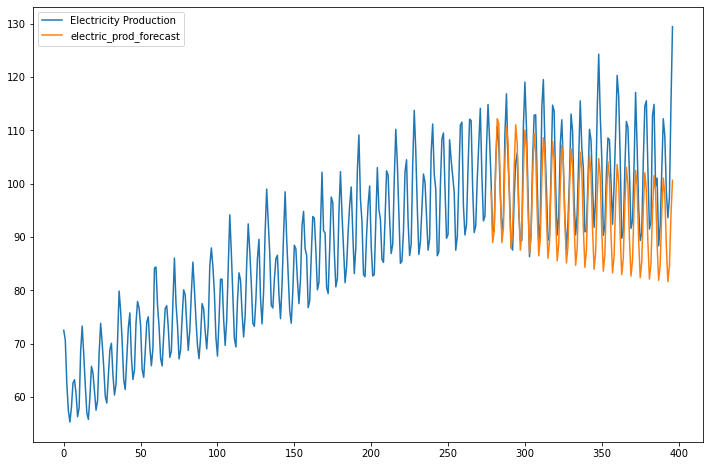

In [135]:
# Plotting the electric production data with the forecasted data. 

electric_production[['Electricity Production','electric_prod_forecast']].plot(figsize=(12,8))

In [136]:
# calculating mean absolute error for the test set

print(mean_squared_error(electric_production['electric_prod_forecast'].tail(int(0.3*len(electric_production))),electric_production['electric_prod_forecast'].tail(int(0.3*len(electric_production)))))


0.0


In [137]:
# calculating mean squared error for the test set

print(mean_absolute_error(electric_production['electric_prod_forecast'].tail(int(0.3*len(electric_production))),electric_production['electric_prod_forecast'].tail(int(0.3*len(electric_production)))))

0.0


In [138]:
# I am not sure why the above values are 0, the code it correct.

In [139]:
# I do not think this model is good. I think if we worked with the differenced data it would 
# produce better results. Since the data wasn't stationary, it did not work well. 